### First, take a look at the dataset

In [4]:
path="datasets/bitly_usagov/example.txt"
with open(path) as f:
    for line in f:
        print (line)
        break

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



### Json package helps loading 

In [7]:
import json
records=[json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Get all timezones

In [12]:
from collections import defaultdict
def count(sequence):
    counts=defaultdict(int)
    for x in sequence:
        counts[x]+=1
    return counts

time_zones=[rec["tz"] for rec in records if "tz" in rec]
time_zones_counts=count(time_zones)
time_zones_counts['America/Chicago']

400

In [15]:
def top_n(d,n=10):
    return sorted(d.items(),key= lambda x:x[1],reverse=True)[:n]
top_10=top_n(time_zones_counts)
top_10


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [16]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### With pandas

In [19]:
import pandas as pd
frame=pd.DataFrame(records)
frame["tz"].value_counts()[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [20]:
clean_tz=frame["tz"].fillna("MISSING")
clean_tz[clean_tz==""]="UNKNOWN"
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
UNKNOWN                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
MISSING                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

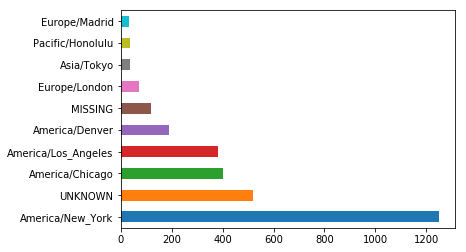

In [22]:
%matplotlib inline
tz_counts[:10].plot(kind="barh",rot=0)

### Take a look at agent info

In [24]:
agents=pd.Series([x.split()[0].strip() for x in frame["a"].dropna()])
agents[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

### Take a look at operating system

In [27]:
import numpy as np
cframe=frame[frame.a.notnull()]
systems=np.where(cframe.a.str.contains('Windows'),"Window","Not Window")
systems[:5]

array(['Window', 'Not Window', 'Window', 'Not Window', 'Window'],
      dtype='<U10')

In [32]:
by_tz_os=cframe.groupby(["tz",systems])
agg_counts=by_tz_os.size().unstack().fillna(0)

In [34]:
indexer=agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [36]:
count_subset=agg_counts.take(indexer)[-10:]
count_subset

,Not Window,Window
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


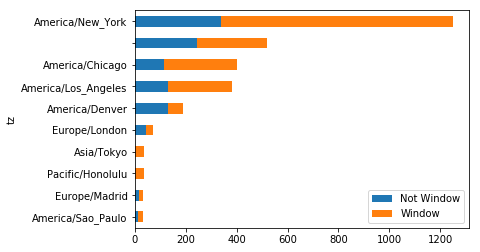

In [37]:
count_subset.plot(kind="barh",stacked=True)

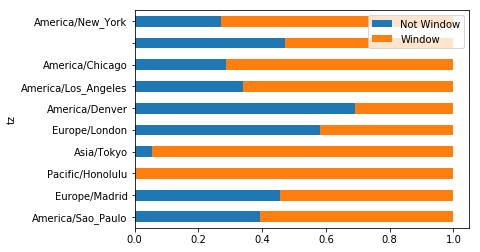

In [38]:
normed_subset=count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind="barh",stacked=True)